In [10]:
import pandas as pd
import numpy as np
#from bokeh.plotting import figure, output_file, show
import seaborn as sns
#import plotly.express as px

In [11]:
path_elecciones = './../dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv'
# Dataset General
elecciones = pd.read_csv(path_elecciones)
elecciones.shape

(616678, 10)

### JOINS

In [28]:
# Uso comunas.csv para reemplazar el numero de comuna por los barrios que contienen
# El resultado aparece en la columna "BARRIOS"
comunas     = pd.read_csv('./tablas/comunas.csv')
elecciones  = pd.merge(elecciones, comunas, on='NOMBRE_REGION', how='left')
elecciones.head(3)

,CODIGO_DISTRITO,CODIGO_SECCION,CODIGO_CIRCUITO,CODIGO_MESA,CODIGO_CATEGORIA,CODIGO_AGRUPACION,VOTOS_AGRUPACION,NOMBRE_CATEGORIA,NOMBRE_REGION,NOMBRE_AGRUPACION,BARRIOS_x,BARRIOS_y
0,1,1001,1001000001,0100100001X,100000000000,13,1,Presidente y Vicepresidente de la República,COMUNA 01,MOVIMIENTO AL SOCIALISMO,"Retiro, San Nicolas, Puerto Madero, San Telmo,...","Retiro, San Nicolas, Puerto Madero, San Telmo,..."
1,1,1001,1001000001,0100100001X,100000000000,131,5,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE NOS,"Retiro, San Nicolas, Puerto Madero, San Telmo,...","Retiro, San Nicolas, Puerto Madero, San Telmo,..."
2,1,1001,1001000001,0100100001X,100000000000,132,2,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE PATRIOTA,"Retiro, San Nicolas, Puerto Madero, San Telmo,...","Retiro, San Nicolas, Puerto Madero, San Telmo,..."


In [14]:
#Dataset exclusivo de Consenso Federal
elecciones_consenso = elecciones[elecciones.NOMBRE_AGRUPACION == "CONSENSO FEDERAL"]

## Analisis general de resultados de votacion de Presidente y Vicepresidente de la Republica

In [15]:
# Cantidad de votos por partido, separado por categoria
### Categoria Presidente y Vicepresidente de la Republica: cantidad de grupos por agrupacion
elecciones_presidente = elecciones[elecciones.NOMBRE_CATEGORIA=="Presidente y Vicepresidente de la República"]
# Agrupo por agrupacion y sumo la columna de votos. Luego la ordeno de mayor a menor segun cantidad de votos
votos_presidente = elecciones_presidente[['VOTOS_AGRUPACION', 'NOMBRE_AGRUPACION']].groupby(['NOMBRE_AGRUPACION']).sum().sort_values(by='VOTOS_AGRUPACION', ascending=False)
# Convierto index en columna de nombre de agrupaciones
votos_presidente.reset_index(inplace=True)
# Agrego columna de porcentajes
votos_presidente['Porcentaje'] = round(votos_presidente['VOTOS_AGRUPACION'] / votos_presidente['VOTOS_AGRUPACION'].sum()*100, 2)
votos_presidente

,NOMBRE_AGRUPACION,VOTOS_AGRUPACION,Porcentaje
0,JUNTOS POR EL CAMBIO,863169,44.25
1,FRENTE DE TODOS,637891,32.70
2,CONSENSO FEDERAL,168607,8.64
3,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,75746,3.88
4,UNITE POR LA LIBERTAD Y LA DIGNIDAD,68828,3.53
5,BLANCO,62397,3.20
6,FRENTE NOS,22592,1.16
7,MOVIMIENTO AL SOCIALISMO,21470,1.10
8,NULO,19116,0.98
9,FRENTE PATRIOTA,5172,0.27


[Text(0.5, 0, 'Cantidad de votos por agrupacion'),
 Text(0, 0.5, 'Nombre de agrupacion'),
 Text(0.5, 1.0, 'Presidente y Vicepresidente de la Republica: RESULTADOS')]

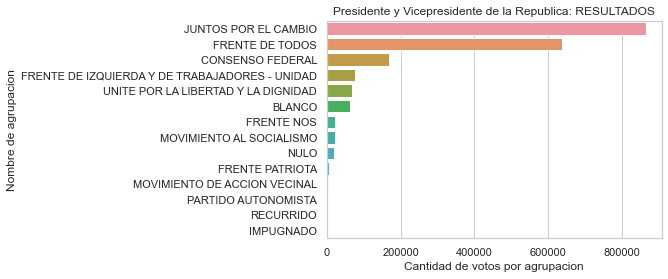

In [16]:
# Grafico del total de votos
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.barplot(x="VOTOS_AGRUPACION", y='NOMBRE_AGRUPACION', data = votos_presidente)
ax.set(xlabel='Cantidad de votos por agrupacion', ylabel='Nombre de agrupacion', title='Presidente y Vicepresidente de la Republica: RESULTADOS')


## Analisis de resultados por COMUNA

### Presidente y Vicepresidente

In [18]:
comuna_presidente = elecciones_presidente[['VOTOS_AGRUPACION', 'NOMBRE_AGRUPACION', 'NOMBRE_REGION']].groupby(['NOMBRE_AGRUPACION', 'NOMBRE_REGION']).sum()
comuna_presidente.head(16)

VOTOS_AGRUPACION
NOMBRE_AGRUPACION NOMBRE_REGION                  
BLANCO            COMUNA 01                  3674
                  COMUNA 02                  2493
                  COMUNA 03                  3790
                  COMUNA 04                  5801
                  COMUNA 05                  3810
                  COMUNA 06                  3968
                  COMUNA 07                  4631
                  COMUNA 08                  3792
                  COMUNA 09                  3818
                  COMUNA 10                  4031
                  COMUNA 11                  4363
                  COMUNA 12                  4720
                  COMUNA 13                  4895
                  COMUNA 14                  4102
                  COMUNA 15                  4509
CONSENSO FEDERAL  COMUNA 01                  8305

## Analisis particular: Consenso Federal

### Analisis por comuna

In [26]:
comuna_consenso = elecciones_consenso[['VOTOS_AGRUPACION', 'NOMBRE_AGRUPACION', 'NOMBRE_REGION']].groupby(['NOMBRE_AGRUPACION', 'NOMBRE_REGION']).sum().sort_values(by=['VOTOS_AGRUPACION'], ascending=False)
comuna_consenso.head(30)
# Exporto tabla a la carpeta 'tablas'. Exporto una sola vez
#comuna_consenso.to_csv("./tablas/comuna_consenso.csv", header=True) 

[Text(0.5, 0, 'Cantidad de votos por comuna'),
 Text(0, 0.5, 'Comunas CABA'),
 Text(0.5, 1.0, 'Presidente y Vicepresidente de la Republica: CONSENSO FEDERAL')]

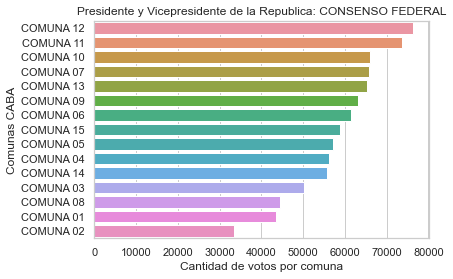

In [20]:
comuna_consenso.reset_index(inplace=True)
comuna_consenso.set_index('NOMBRE_AGRUPACION', inplace=True)
ax = sns.barplot(x="VOTOS_AGRUPACION", y='NOMBRE_REGION', data = comuna_consenso)
ax.set(xlabel='Cantidad de votos por comuna', ylabel='Comunas CABA', title='Presidente y Vicepresidente de la Republica: CONSENSO FEDERAL')

[Text(0.5, 0, 'Cantidad de votos por conjunto de barrios'),
 Text(0, 0.5, 'Barrios CABA'),
 Text(0.5, 1.0, 'Presidente y Vicepresidente de la Republica: CONSENSO FEDERAL')]

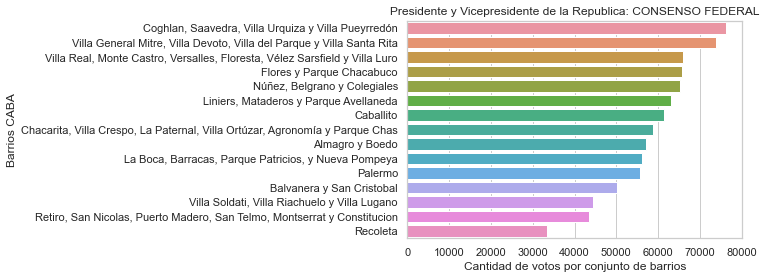

In [21]:
# Mismo grafico y tabla, pero especificando barrios de cada comuna
# Tabla
barrios_consenso = elecciones_consenso[['VOTOS_AGRUPACION', 'NOMBRE_AGRUPACION', 'BARRIOS']].groupby(['NOMBRE_AGRUPACION', 'BARRIOS']).sum().sort_values(by=['VOTOS_AGRUPACION'], ascending=False)
# Grafico
barrios_consenso.reset_index(inplace=True)
barrios_consenso.set_index('NOMBRE_AGRUPACION', inplace=True)
ax = sns.barplot(x="VOTOS_AGRUPACION", y='BARRIOS', data = barrios_consenso)
ax.set(xlabel='Cantidad de votos por conjunto de barrios', ylabel='Barrios CABA', title='Presidente y Vicepresidente de la Republica: CONSENSO FEDERAL')